In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 7]
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### Задание 1  
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
# а) Рассчитаем попарноые значения косинусного расстояния
def cos_count(data):
    ar = []
    for _ in range(len(data)):
        array = []
        for i in range(len(data)):

            k = np.sum(data[_] * data[i]) / (np.sum(np.square(data[_])))**0.5 / (np.sum(np.square(data[i])))**0.5
            array.append(k)
        ar.append(array)
    return ar

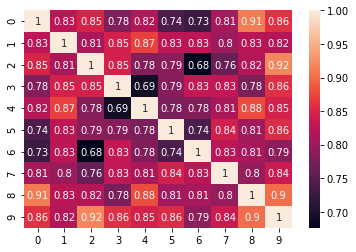

In [4]:
import seaborn as sns
sns.heatmap(cos_count(ratings), annot=True)
plt.show()

#### Наибольшее совпадение у 3го и 10го пользователей - значение косинуса - 0,92

In [5]:
#  б) Уменьшим признаковое пространство фильмов с 5 до 15 и посчитаем для него косинусное расстояние,  
# проверим как изменится теплограмма

In [6]:
from sklearn.decomposition import PCA

In [7]:
model = PCA(n_components=5, svd_solver='full')
ratings_dim = model.fit_transform(ratings)
ratings_dim

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

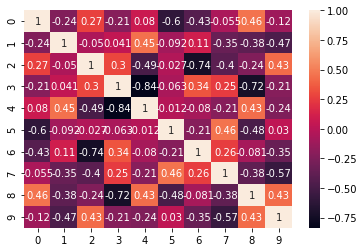

In [8]:
sns.heatmap(cos_count(ratings_dim), annot=True)
plt.show()

Значения сильно исказились, косинусная метрика 3 и 10 пользователя уже не максимальная, увеличились метрики среди пользователей  
между которыми в исходной таблице они были чуть меньше максимального значения, т.е некторая объективность информации сохраняется

### Задание 2  
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге)

In [310]:
from sympy import tan, sin, cos, symbols

x = symbols('x')
expr = (tan(sin(x)))**2 + cos(2*x + 3)
y_ = expr.diff(x)
d = lambdify(x, y_)
d(1)

4.640843465296352

### Задание 3  
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.  
Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [115]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [11]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [12]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

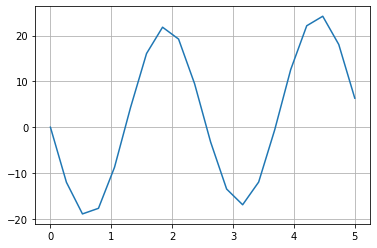

In [170]:
plt.plot(x, fx)
plt.grid()
plt.show()

Для решения данной задачи будем использовать метод градиентного спуска

In [279]:
import warnings
warnings.filterwarnings('ignore')

gamma = 0.01
 
def grad1(x, a, b):
    return np.e**a * np.sin(b*x)

def grad2(x, a, b):
    return np.cos(b*x) * x * np.e**a



ar1 = []
ara = []
arb = []
ar = []


for k in range(1, len(x)):
    a = 0
    b = 0
    for _ in range(500):
    
        a = a - gamma*grad1(x[k], a, b)
        b = b - gamma*grad2(x[k], a, b)
    
        ar1.append(abs(f(x[k], a, b) - fx[k]))
        ara.append(a)
        arb.append(b)

    for i, el in enumerate(ar1):
        if el == min(ar1):
            ar.append((el, ara[i], arb[i]))
    
    
    

In [280]:
data = pd.DataFrame(ar, columns=['error', 'a', 'b'])
data

,error,a,b
0,0.416249,3.057924,-2.429171
1,0.416249,3.057924,-2.429171
2,0.416249,3.057924,-2.429171
3,0.416249,3.057924,-2.429171
4,0.416249,3.057924,-2.429171
5,0.416249,3.057924,-2.429171
6,0.416249,3.057924,-2.429171
7,0.416249,3.057924,-2.429171
8,0.416249,3.057924,-2.429171
9,0.064485,1.778133,-0.596902


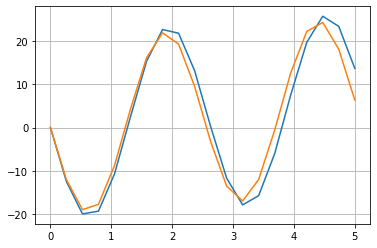

In [271]:
plt.plot(x, f(x, 3.06, -2.43))
plt.plot(x, fx)
plt.grid()
plt.show()

Метод градиентного спуска не является абсолютно автоматизированным, как можно видеть больше всего подошли значения,  
найденные по точкам, давшим не самую маленькую ошибку, также невозможно найти правильное значение не подобрав  
правильно парметр гамма
    

### Задание 4  
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50.  
Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних

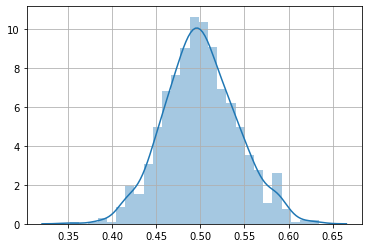

In [291]:
rand_values = np.random.rand(1, 20)
array = []
for _ in range(1000):
    array.append((np.random.rand(1, 50)).mean())

sns.distplot(array)
plt.grid()
plt.show()

### Задание 5  
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



In [293]:
m = np.array([[1, 4],  
              [1, 1]])  
print(m)

[[1 4]
 [1 1]]


In [294]:
u, v = np.linalg.eig(m)

In [295]:
print(f'Собственные значения матрицы m1:{u}')
print(f'Собственные векторы матрицы m1:{v}')

Собственные значения матрицы m1:[ 3. -1.]
Собственные векторы матрицы m1:[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
